<a href="https://colab.research.google.com/github/JCruzJorge/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_CruzJorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales)

Author: Jorge Cruz

## Project Overview

## Load and Inspect Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Loading the data from path

In [3]:
filepath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(filepath)

#Display top 5 rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Print summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [5]:
df.shape

(8523, 12)

- There are 8523 rows and 12 colums in the dataframe

Check the datatypes of each variable



In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- We will drop the `Unnamed: 0` column since this column is a repeating of the index.
- We will then check `df.info()` again to make sure that the column is dropped.

Check for duplicates

In [7]:
df.duplicated().sum()

0

- There are no duplicates in the data



Identify missing values

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Missing Values:
  - There are `1463` missing values in the `Item_Weight` column. (17.2%)
  - There are `2410` missing values in the `Outlet_Size` column. (28.3%)

We chose these two values due to inconsistent and missing data, which requires additional EDA.

*Fixing any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).*

In [9]:
#First determine the categorical columns
CatColumns = df.select_dtypes(object).columns
CatColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [10]:
#determinine the unique values in the categorical columns
df[CatColumns].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [11]:
#display the values for all categoriavl columns except for Item_Identifier as it has a lot of values
CatColumns = df.select_dtypes(object).columns.drop('Item_Identifier')

for i in CatColumns:
    print(f'Value counts for {i}')
    print(df[i].value_counts())
    print('\n')

Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value counts for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, 

- Item_Fat_Content has inconsitent values:'LF', 'reg', 'low fat'


In [12]:
#replacing the inconsistent values with the correct values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

In [13]:
#Checking if the values have been fixed
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

***Obtain the summary statistics for numerical features***

In [14]:
#Get all numeric columns
NumColumns = df.select_dtypes('number').columns
NumColumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
#show summary statistics for the numeric columns
df[NumColumns].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

- Note: There are many different ways students could tackle this EDA. Additionally, there are more advanced ways to plot the data.

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

### Univariate Analysis

#### Histograms

Using Seaborn to plot the histograms for each numerical feature in the data

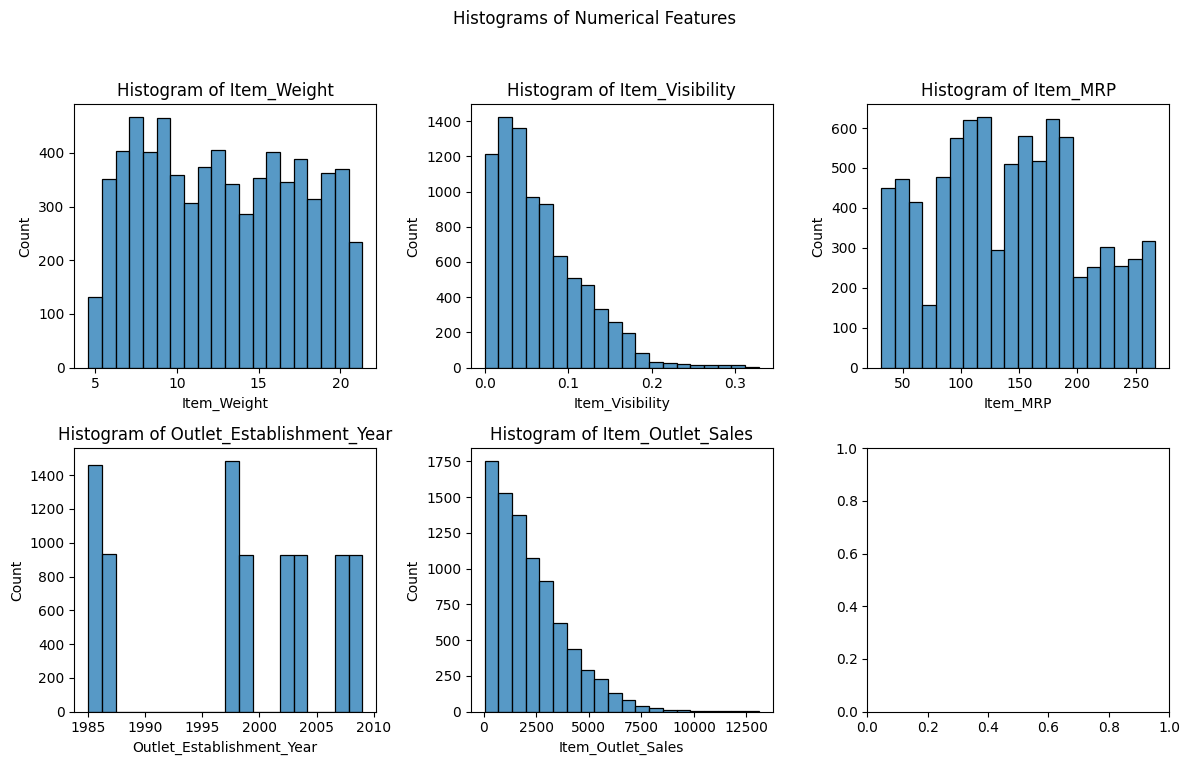

In [55]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plotting histograms for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=feature, bins=20,  ax=ax[row, col])
    ax[row, col].set_title(f"Histogram of {feature}")

plt.suptitle("Histograms of Numerical Features")

# Adjusting the layout to avoid overlap of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

#### Boxplots

Creating boxplots to view statistical summaries of numerical features

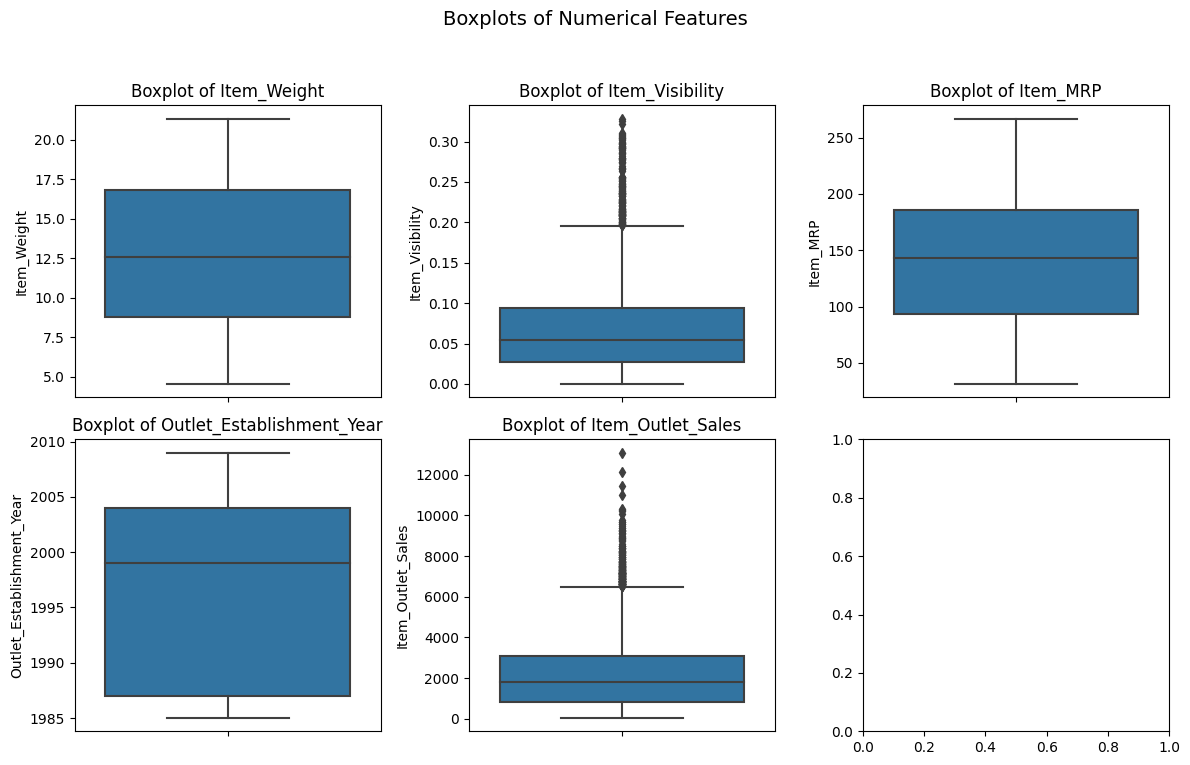

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plotting boxplots for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, y=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot of {feature}")

plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


#### Countplots

Creating counplots to analyse the distribution of categorical features

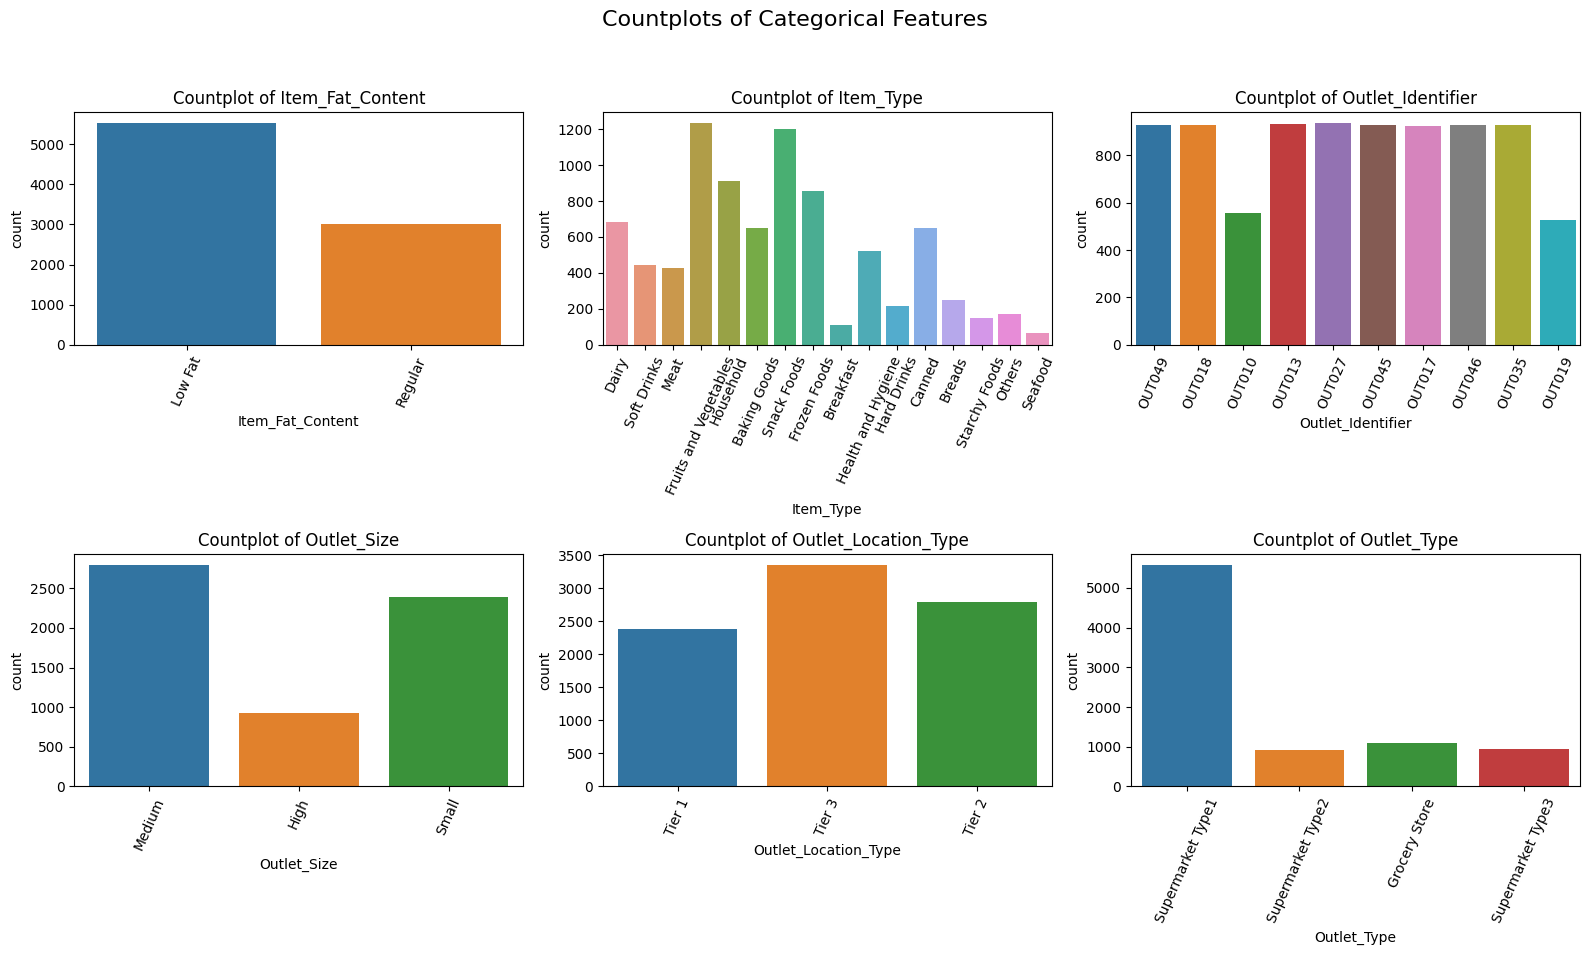

In [57]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Plotting countplots for each categorical feature on its own subplot using Seaborn
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Countplot of {feature}")
    axes[row, col].tick_params(axis='x', rotation=66)

plt.suptitle("Countplots of Categorical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


### Multivariate Analysis

#### Correlation Heatmap

Creating a correlation heatmap to visualize the pairwise correlation between the numerical features

<ipython-input-69-556776f075b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues');


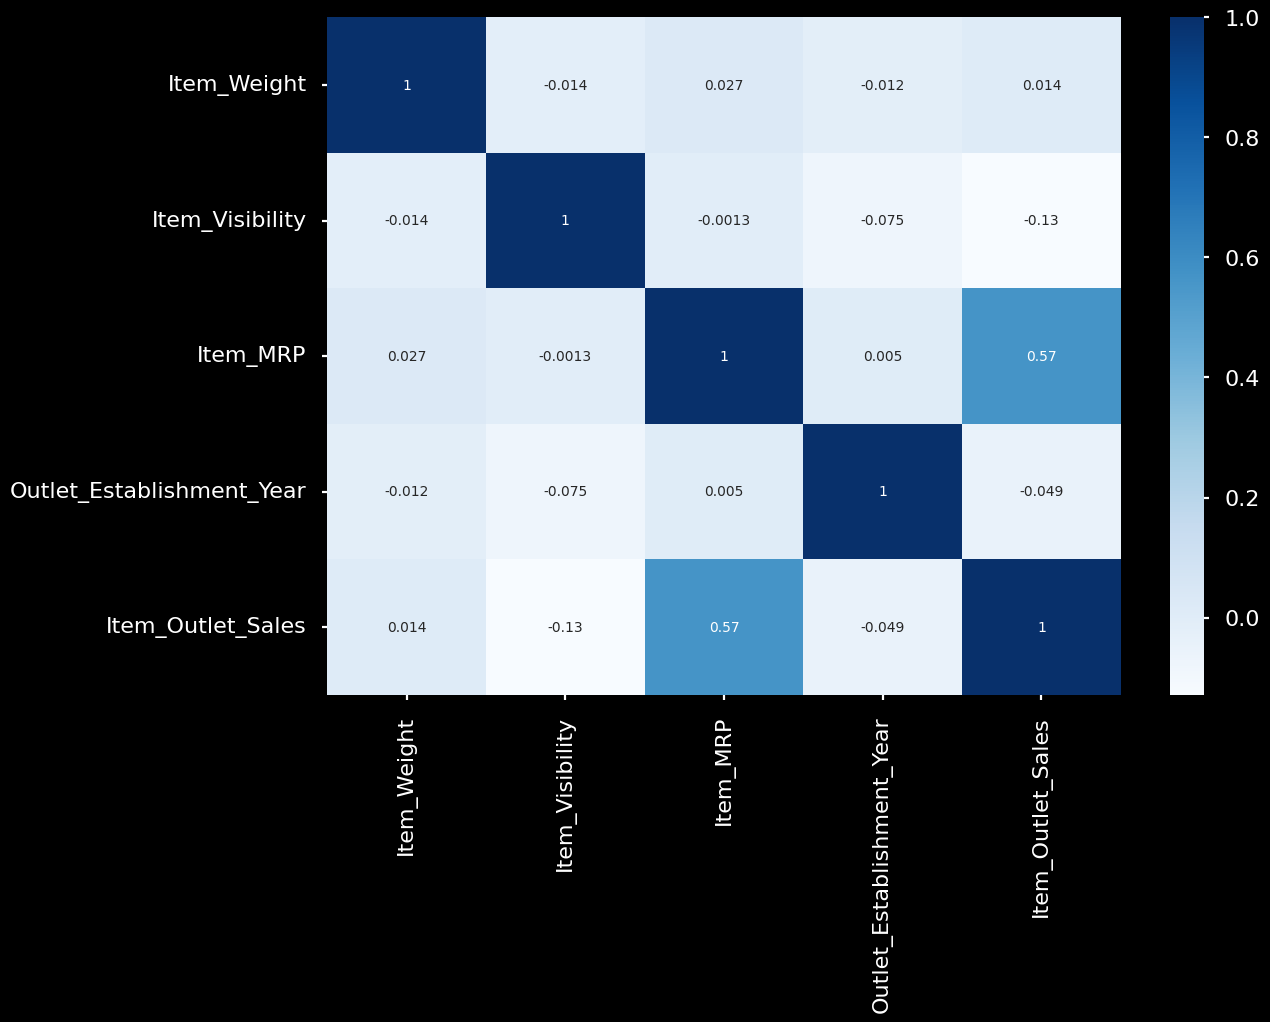

In [69]:
sns.heatmap(df.corr(),annot=True,cmap='Blues');

#### Regression Plots

Creating regression plots to summarise and assess the relationship between numerical features and Item Outlet Sales

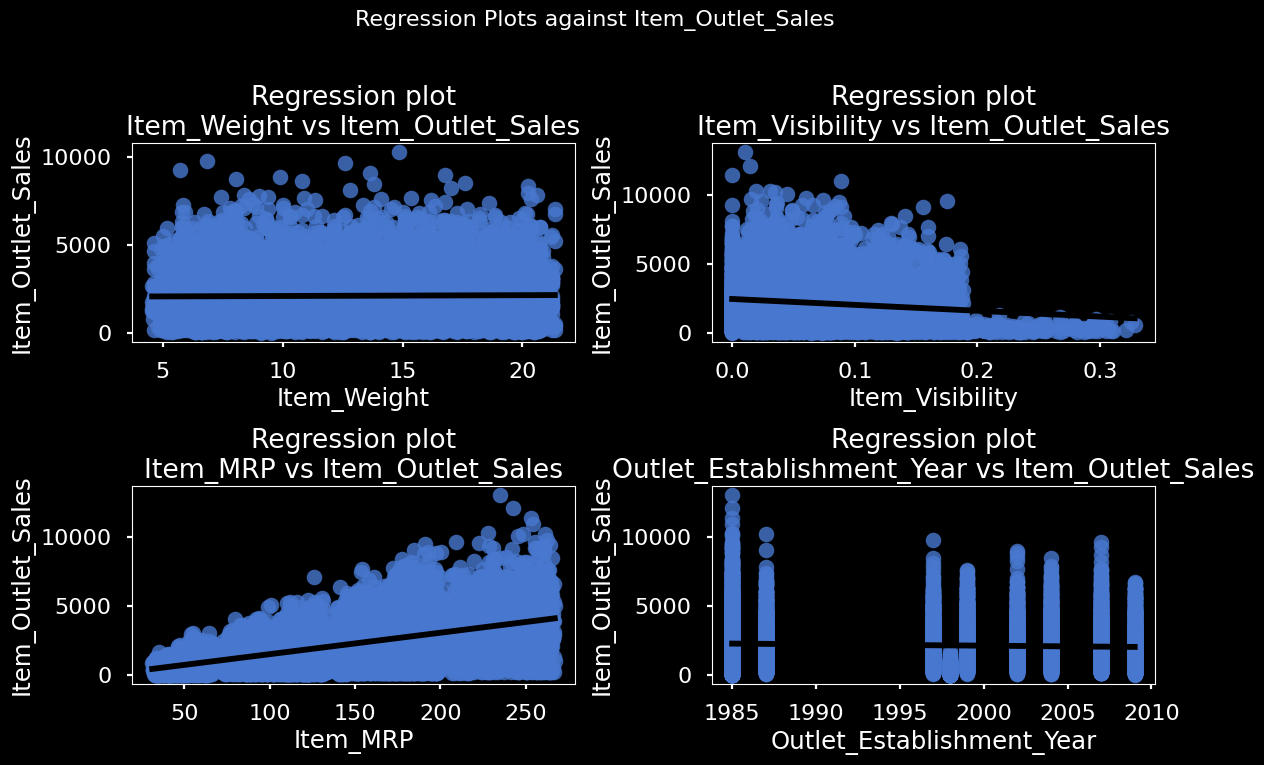

In [68]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotting regression plots for each numerical feature against 'Item_Outlet_Sales'
for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.regplot(data=df, x=feature, y='Item_Outlet_Sales', ax=axes[row, col],
                line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
    axes[row, col].set_title(f"Regression plot\n{feature} vs Item_Outlet_Sales")

plt.suptitle("Regression Plots against Item_Outlet_Sales", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

## Explanatory Data Analysis

### Feature Inspection

In [63]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-63-9109d13ca073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-63-9109d13ca073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [64]:
#Function for Categorical featues
def analyze_categorical_feature(df, feature_name):
    """
    Perform analysis for a given categorical feature.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the categorical feature to analyze.

    Returns:
        None
    """

    ax = sns.countplot(data=df, x=feature_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Calculate the number of null values in the feature
    total_rows = len(df)
    null_values = df[feature_name].isna().sum()
    percentage_null_values = (null_values / total_rows) * 100

    print(f"\nNumber of rows with null values in '{feature_name}' column: {null_values}")
    print(f"Percentage of null values in '{feature_name}' column: {percentage_null_values:.2f}%")

    # Determine if the feature is quasi-constant or constant (most common value more than 98% of data)
    val_counts = df[feature_name].value_counts(dropna=False)
    freq = val_counts.values[0]
    perc_most_common = freq / len(df) * 100

    if perc_most_common > 98:
        print(f"\n[!] Warning: '{feature_name}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print(f"'{feature_name}' is Not constant or quasi-constant.")

    # Calculate the cardinality of the feature
    cardinality = df[feature_name].nunique()
    print(f"The cardinality of '{feature_name}' feature is: {cardinality}")



In [65]:
#Function for numerical features

def analyze_numeric_feature(df, feature_name):
    """
    Perform analysis for a specific numeric feature in the DataFrame.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the numeric feature to analyze.

    Returns:
        None
    """

    # Plot the box plot for the numeric feature
    ax = sns.boxplot(data=df, x=feature_name)
    ax.set_title(f"Box Plot for {feature_name}")
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Value")
    ax.figure.show()

    # Calculate the number of null values in the feature
    total_rows = len(df)
    null_values = df[feature_name].isna().sum()
    percentage_null_values = (null_values / total_rows) * 100

    print(f"Number of rows with null values: {null_values}")
    print(f"Percentage of null values: {percentage_null_values:.2f}%")

    # Determine if the feature is constant or quasi-constant (most common value more than 98% of data)
    val_counts = df[feature_name].value_counts(dropna=False)
    freq = val_counts.values[0]
    perc_most_common = freq / len(df) * 100

    if perc_most_common > 98:
        print(f"\n[!] Warning: '{feature_name}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print(f"'{feature_name}' is Not constant or quasi-constant.")

    # Calculate the cardinality of the feature
    cardinality = df[feature_name].nunique()
    print(f"The cardinality of '{feature_name}' feature is: {cardinality}")



In [66]:
#Function for plotting multivariate visualisations between fatures and target

def plot_feature_vs_target(df, feature_name):
    """
    Plot a bar plot for categorical features and a scatter plot for numerical features against the target variable.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        feature_name (str): The name of the feature to plot against the target variable.

    Returns:
        None
    """
    if feature_name not in df.columns:
        print(f"'{feature_name}' feature not found in the DataFrame.")
        return

    target_variable = 'Item_Outlet_Sales'
    data_type = df[feature_name].dtype

    if data_type == 'object' or data_type == 'category':
        # Categorical feature, create a bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x=feature_name, y=target_variable)
        plt.title(f"{feature_name} vs. {target_variable}")
        plt.xlabel(feature_name)
        plt.ylabel(target_variable)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()
    else:
        # Numerical feature, create a scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=feature_name, y=target_variable)
        plt.title(f"{feature_name} vs. {target_variable}")
        plt.xlabel(feature_name)
        plt.ylabel(target_variable)
        plt.grid(True)
        plt.show()




#Item_Identifier
*Product ID*


Number of rows with null values in 'Item_Identifier' column: 0
Percentage of null values in 'Item_Identifier' column: 0.00%
'Item_Identifier' is Not constant or quasi-constant.
The cardinality of 'Item_Identifier' feature is: 1559


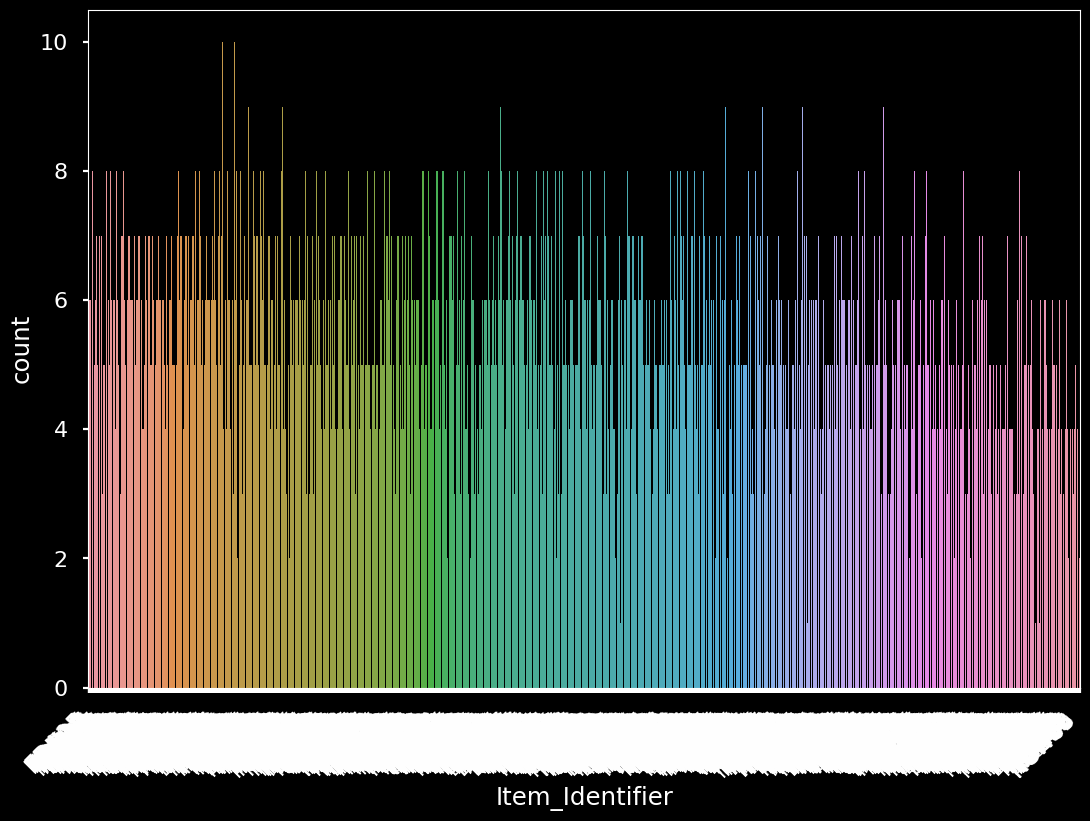

In [59]:
analyze_categorical_feature(df, 'Item_Identifier')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  - (0.0%)

3. Is the feature constant or quasi-constant?
  - This feature is not constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality is 1559. This is high.

5. Would we know this BEFORE the target is determined?
  - N0.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, due to extremely high cardinality.



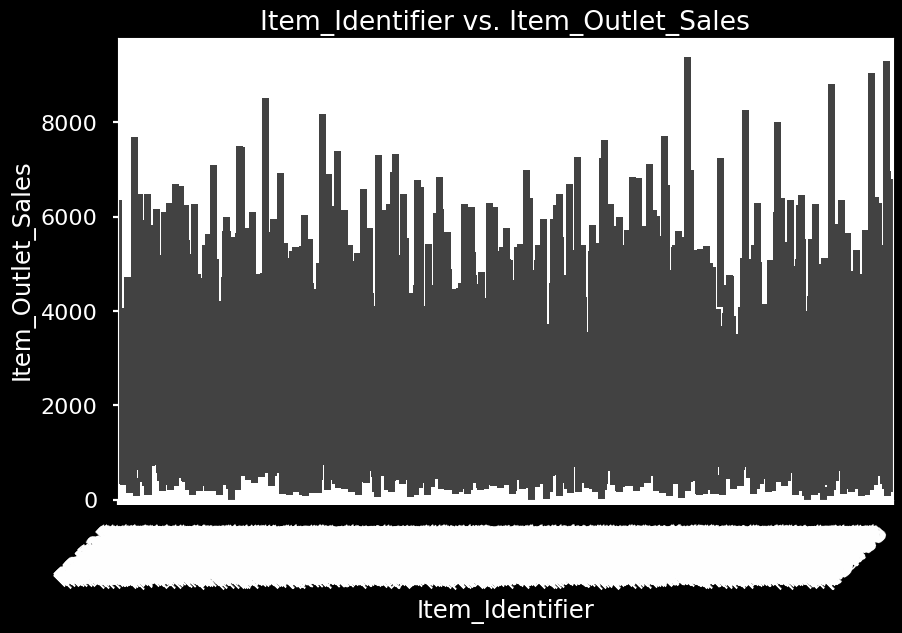

In [60]:
#Plot Item Identifier against the target
plot_feature_vs_target(df, 'Item_Identifier')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- No, because this is an identifier.

2. Does this feature appear to be a predictor of the target?

- No, it does not.





#Item_Weight
*Weight of product*

Number of rows with null values: 1463
Percentage of null values: 17.17%
'Item_Weight' is Not constant or quasi-constant.
The cardinality of 'Item_Weight' feature is: 415


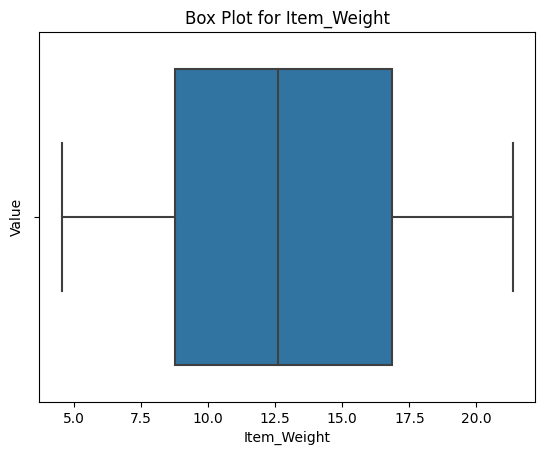

In [26]:
analyze_numeric_feature(df, 'Item_Weight')

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (numeric)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values
  - (17.7%)

3. Is the feature constant or quasi-constant?
  - This feature is not constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality is 416. This is high.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



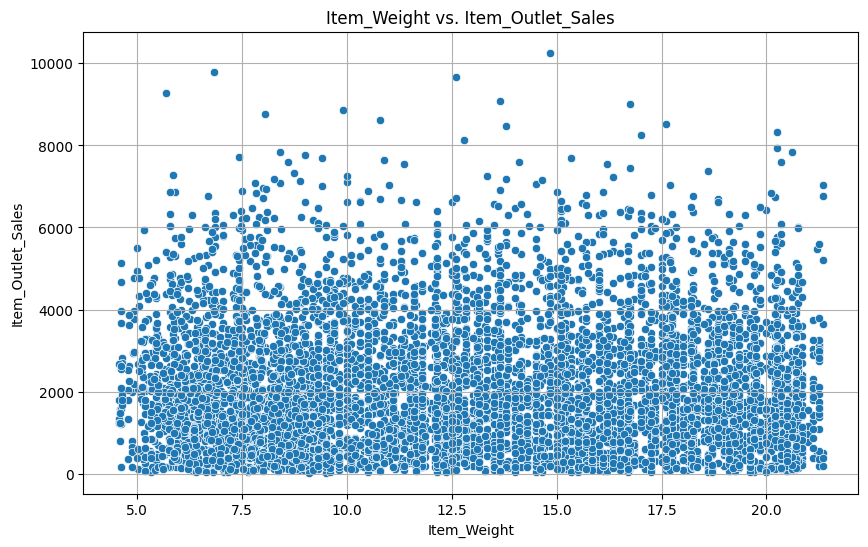

In [27]:
#Plot Item_Weight against the target
plot_feature_vs_target(df, 'Item_Weight')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- No, item weight doesn't mean that it costs more

2. Does this feature appear to be a predictor of the target?

- No





#Item_Fat_Content
Description: *Whether the product is low-fat or regular*


Number of rows with null values in 'Item_Fat_Content' column: 0
Percentage of null values in 'Item_Fat_Content' column: 0.00%
'Item_Fat_Content' is Not constant or quasi-constant.
The cardinality of 'Item_Fat_Content' feature is: 2


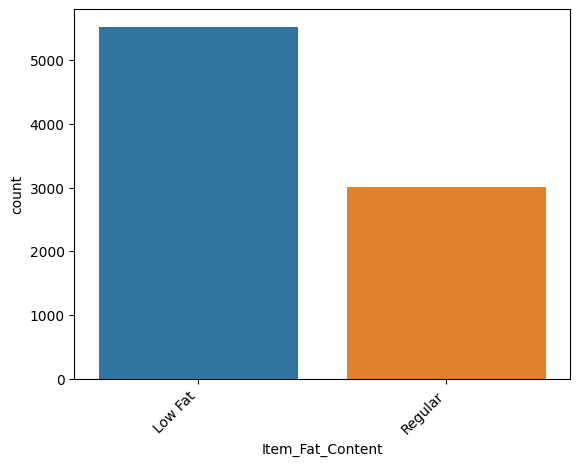

In [28]:
analyze_categorical_feature(df, 'Item_Fat_Content');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  - (0.0%)

3. Is the feature constant or quasi-constant?
  - This feature is not constant or quasi-constant.

4. What is the cardinality? Is it high?
  - The cardinality is 2. This is low.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



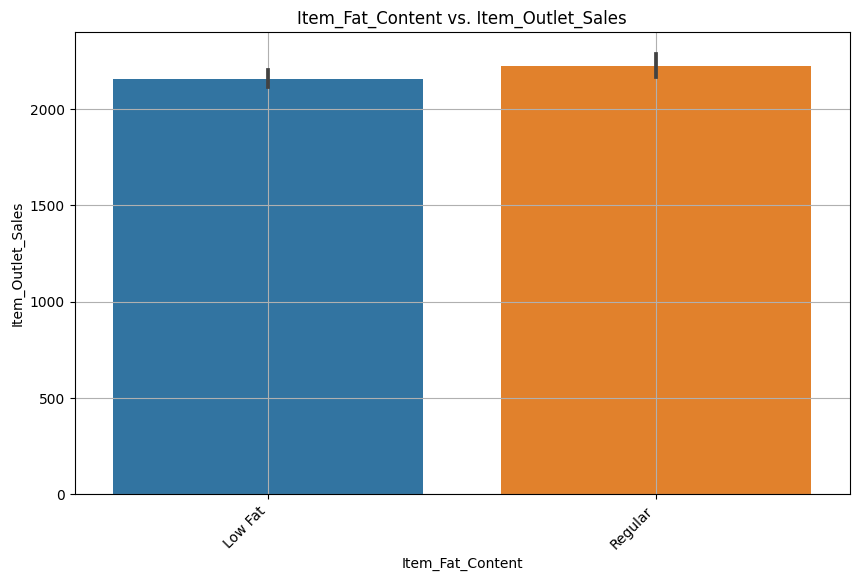

In [29]:
#Plot Item_Fat_Content against the target
plot_feature_vs_target(df, 'Item_Fat_Content')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
    *   *No*

2. Does this feature appear to be a predictor of the target?
    *   *No*





#Item_Visibility
Description: *The percentage of total display area of all products in a store allocated to the particular product*

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_Visibility' is Not constant or quasi-constant.
The cardinality of 'Item_Visibility' feature is: 7880


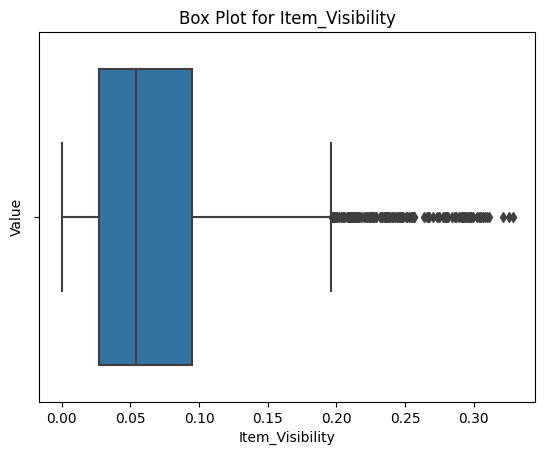

In [30]:
analyze_numeric_feature(df, 'Item_Visibility');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  
- 0 null value
- (0.0%)

3. Is the feature constant or quasi-constant?
- No

4. What is the cardinality? Is it high (>10)?

- 7880 unique values, high cardinality

5. Would we know this feature before the target is determined?

- Yes

6. Is there a business case/understanding reason to exclude based on our business case?

- No


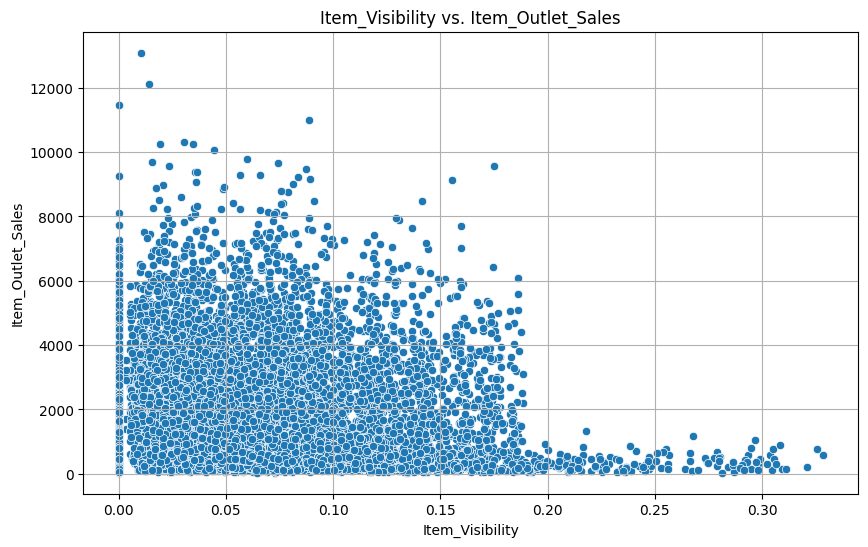

In [31]:
#Plot Item_Visibility against the target
plot_feature_vs_target(df, 'Item_Visibility')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- I would expect items with more visibility to yield more sales

2. Does this feature appear to be a predictor of the target?

- Yes, but the items with lower visibility have higher the sales


#Item_Type
Description: *The category to which the product belongs*


Number of rows with null values in 'Item_Type' column: 0
Percentage of null values in 'Item_Type' column: 0.00%
'Item_Type' is Not constant or quasi-constant.
The cardinality of 'Item_Type' feature is: 16


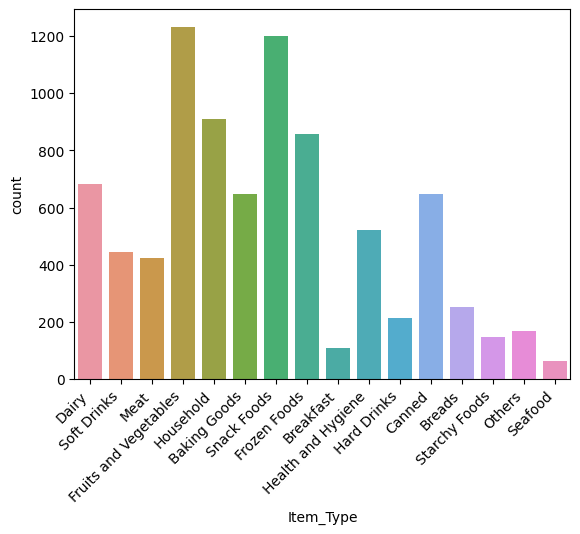

In [32]:
analyze_categorical_feature(df, 'Item_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- 0 null value
- (0.0%)

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- 16 unique values, high cardinality

5. Would we know this feature before the target is determined?

- Yes

6. Is there a business case/understanding reason to exclude based on our business case?

- No


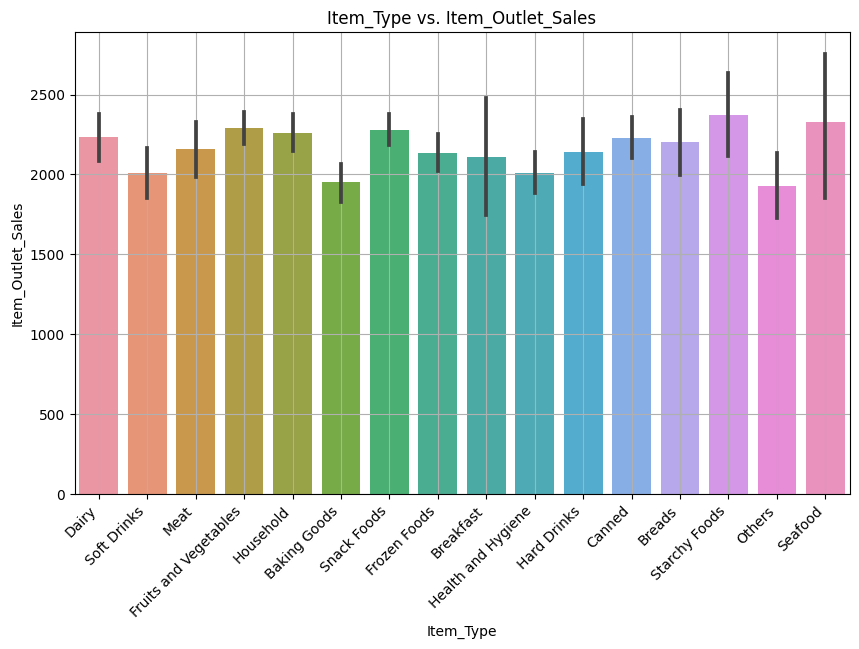

In [33]:
#Plot Item_Type against the target
plot_feature_vs_target(df, 'Item_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes, most have items might produce more sales


2. Does this feature appear to be a predictor of the target?

- Yes, seafood and startchy food have higher sales





#Item_MRP
*Maximum Retail Price (list price) of the product*

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_MRP' is Not constant or quasi-constant.
The cardinality of 'Item_MRP' feature is: 5938


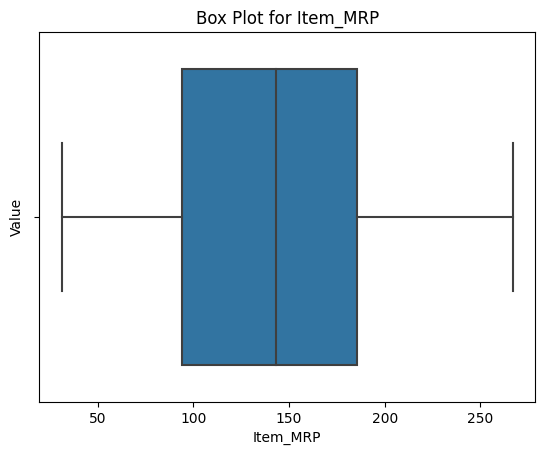

In [34]:
analyze_numeric_feature(df, 'Item_MRP');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical numerical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- 0 null value
- (0.0%)

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- 5938 unique values, high cardinality

5. Would we know this feature before the target is determined?

- Yes

6. Is there a business case/understanding reason to exclude based on our business case?

- No


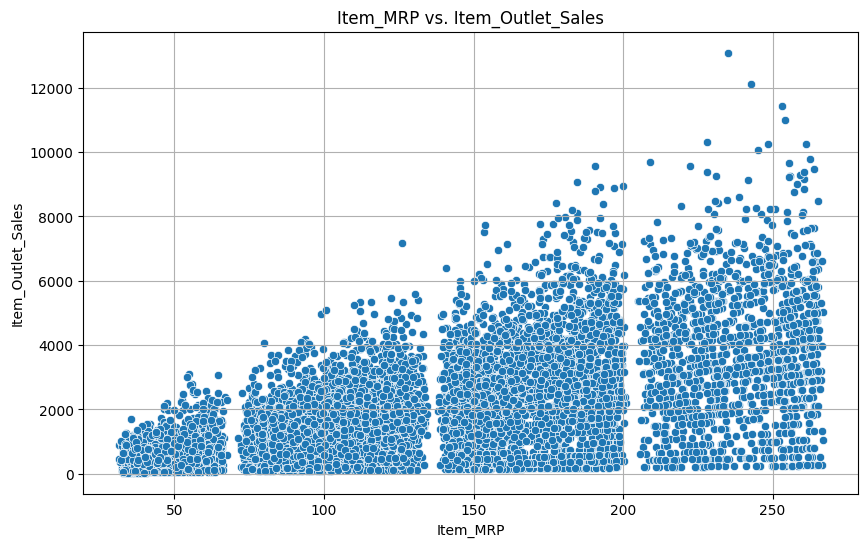

In [35]:
#Plot Item_MRP against the target
plot_feature_vs_target(df, 'Item_MRP')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes, items with higher MRP would produce more sales

2. Does this feature appear to be a predictor of the target?

- Yes,there is a positive correlation between MRP and Sales









#Outlet_Identifier
*Store ID*


Number of rows with null values in 'Outlet_Identifier' column: 0
Percentage of null values in 'Outlet_Identifier' column: 0.00%
'Outlet_Identifier' is Not constant or quasi-constant.
The cardinality of 'Outlet_Identifier' feature is: 10


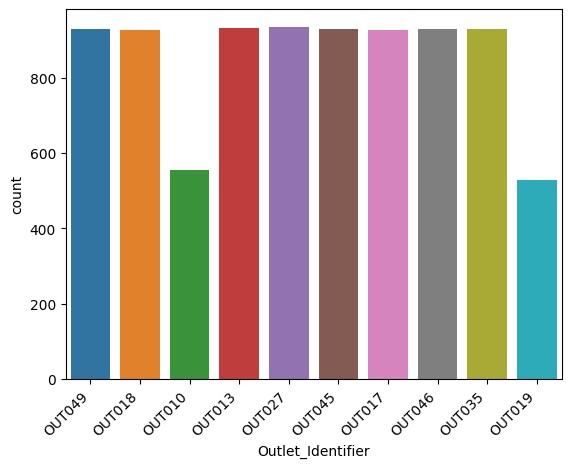

In [36]:
analyze_categorical_feature(df, 'Outlet_Identifier');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- 0 null value
- (0.0%)

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- 10 unique values, low cardinality

5. Would we know this feature before the target is determined?

- Yes

6. Is there a business case/understanding reason to exclude based on our business case?

- No


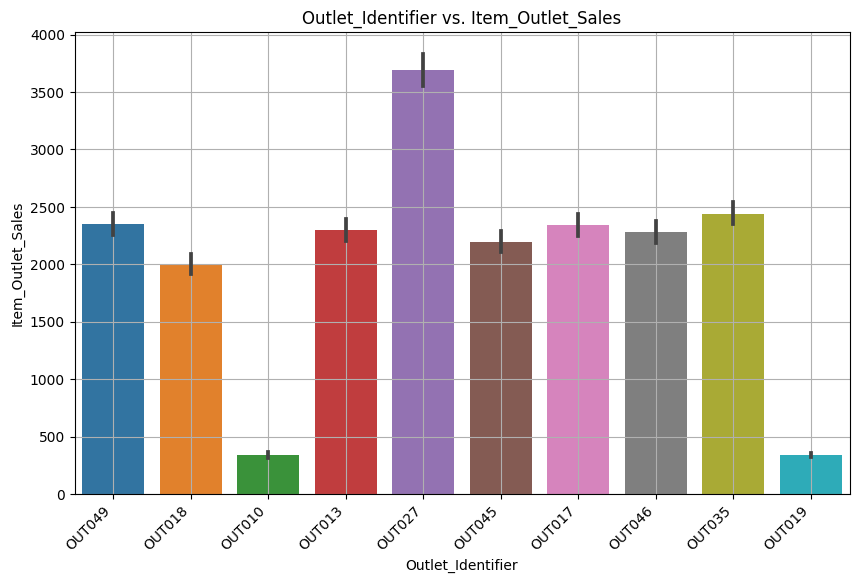

In [37]:
#Plot Outlet_Identifier against the target
plot_feature_vs_target(df, 'Outlet_Identifier')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes, some outlets may have more sales than others

2. Does this feature appear to be a predictor of the target?

- Yes, OUT027, yeilds the most sales





#Outlet_Establishment_Year
*The year in which store was established*

Number of rows with null values: 0
Percentage of null values: 0.00%
'Outlet_Establishment_Year' is Not constant or quasi-constant.
The cardinality of 'Outlet_Establishment_Year' feature is: 9


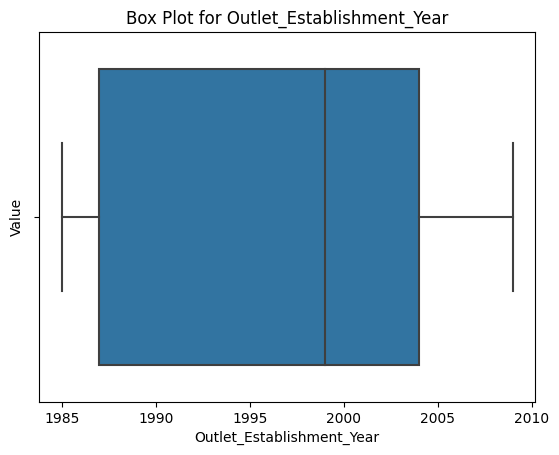

In [38]:
analyze_numeric_feature(df, 'Outlet_Establishment_Year');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical numerical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- 0 null value
- (0.0%)

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- 9 unique values, low cardinality

5. Would we know this feature before the target is determined?

- Yes

6. Is there a business case/understanding reason to exclude based on our business case?

- No


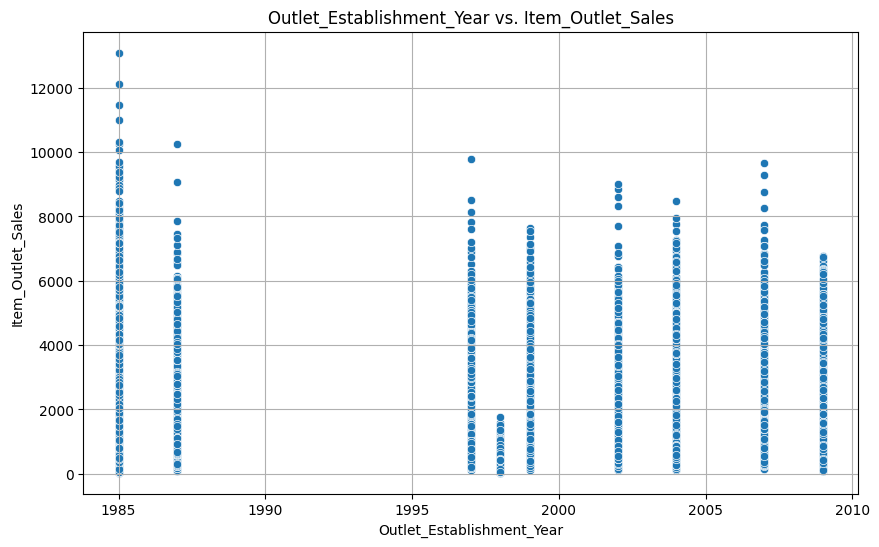

In [39]:
#Plot Outlet_Establishment_Year against the target
plot_feature_vs_target(df, 'Outlet_Establishment_Year')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes, I expected older establishments to have higher sales than newer establishments*

2. Does this feature appear to be a predictor of the target?

- No, the correlation between this feature and sales is not clear





#Outlet_Size
*The size of the store in terms of ground area covered*


Number of rows with null values in 'Outlet_Size' column: 2410
Percentage of null values in 'Outlet_Size' column: 28.28%
'Outlet_Size' is Not constant or quasi-constant.
The cardinality of 'Outlet_Size' feature is: 3


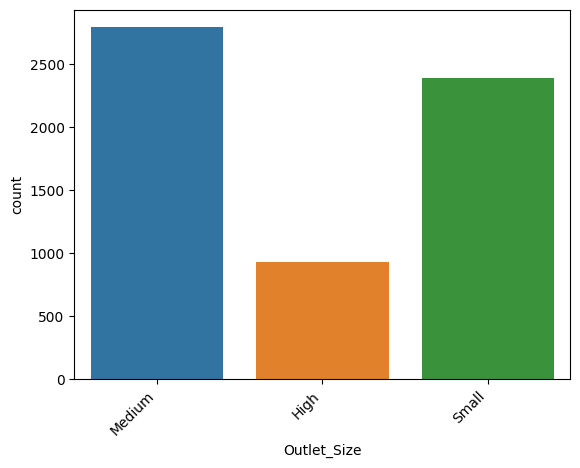

In [40]:
analyze_categorical_feature(df, 'Outlet_Size');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- 2410 null values,
- (28.28%)
- No, dont drop, replace values with placeholder like 'unknown' or 'missing'

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- 3 unique values, low cardinality

5. Would we know this feature before the target is determined?
- Yes
6. Is there a business case/understanding reason to exclude based on our business case?

- No


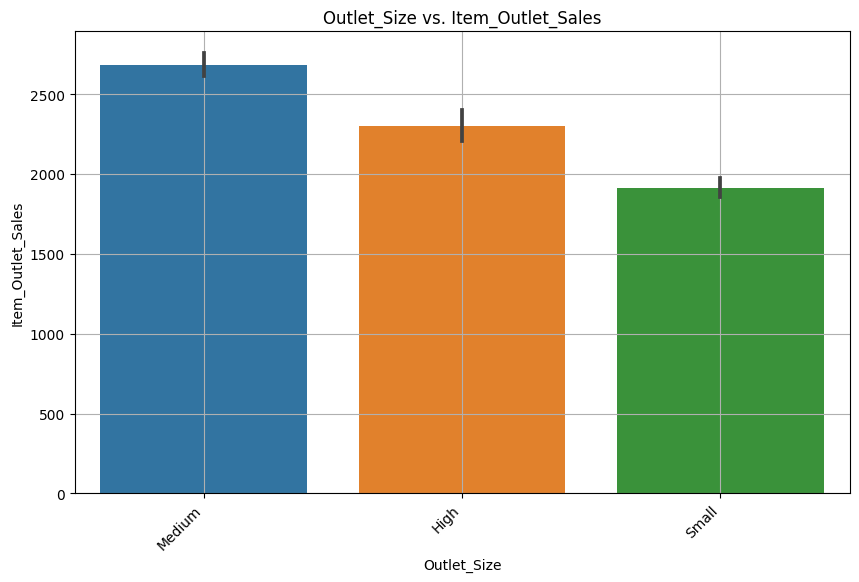

In [41]:
#Plot Outlet_Size against the target
plot_feature_vs_target(df, 'Outlet_Size')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes, I expected bigger outlets to have higher sales than smaller outlets

2. Does this feature appear to be a predictor of the target?

- No, medium outlets have more sales than high sized outlets





#Outlet_Location_Type
*The type of area in which the store is located*


Number of rows with null values in 'Outlet_Location_Type' column: 0
Percentage of null values in 'Outlet_Location_Type' column: 0.00%
'Outlet_Location_Type' is Not constant or quasi-constant.
The cardinality of 'Outlet_Location_Type' feature is: 3


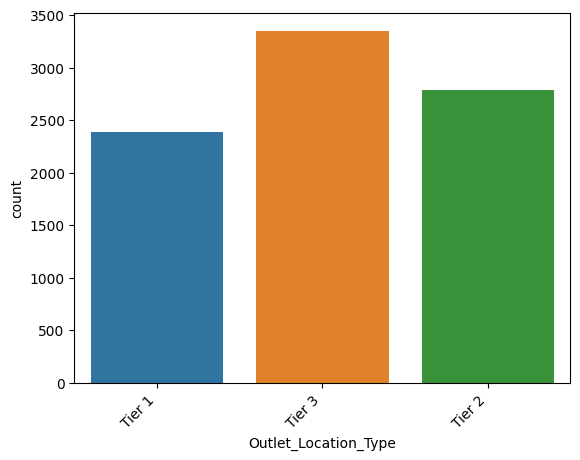

In [42]:
analyze_categorical_feature(df, 'Outlet_Location_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- 0 null value
- (0.0%)

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- 3 unique values, low cardinality

5. Would we know this feature before the target is determined?

- Yes

6. Is there a business case/understanding reason to exclude based on our business case?

- No


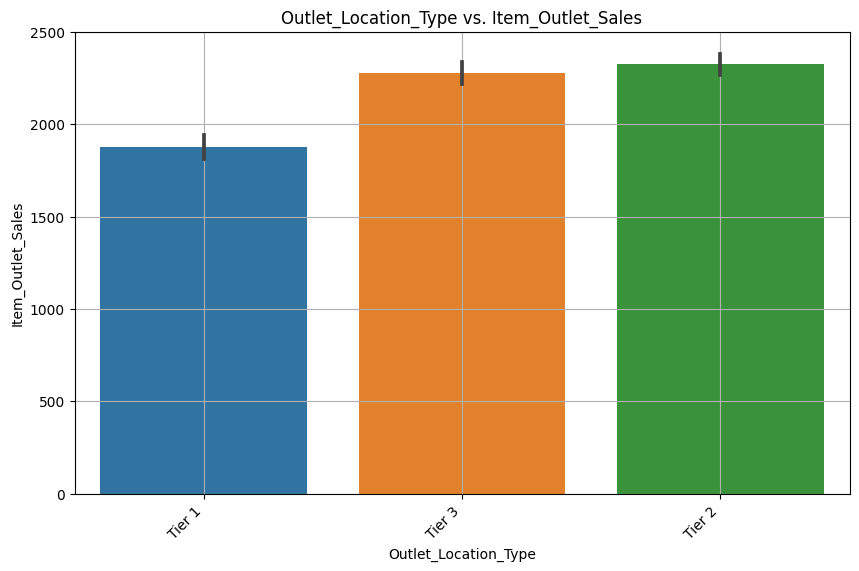

In [43]:
#Plot Outlet_Location_Type against the target
plot_feature_vs_target(df, 'Outlet_Location_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes

2. Does this feature appear to be a predictor of the target?

- No


#Outlet_Type
*Whether the outlet is a grocery store or some sort of supermarket*


Number of rows with null values in 'Outlet_Type' column: 0
Percentage of null values in 'Outlet_Type' column: 0.00%
'Outlet_Type' is Not constant or quasi-constant.
The cardinality of 'Outlet_Type' feature is: 4


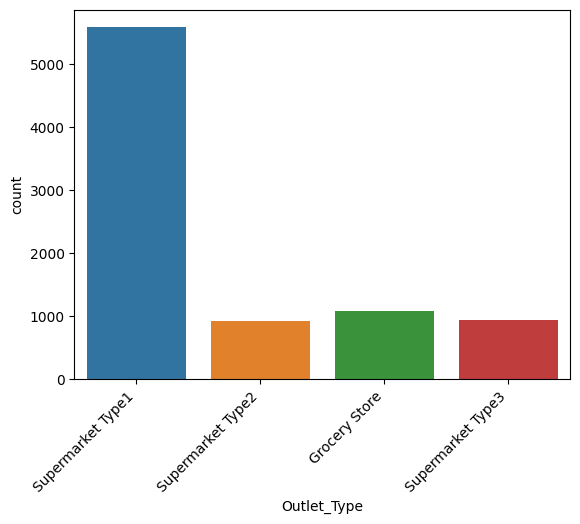

In [44]:
analyze_categorical_feature(df, 'Outlet_Type');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- 0 null value
- (0.0%)

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- 4 unique values, low cardinality

5. Would we know this feature before the target is determined?

- Yes

6. Is there a business case/understanding reason to exclude based on our business case?

- No


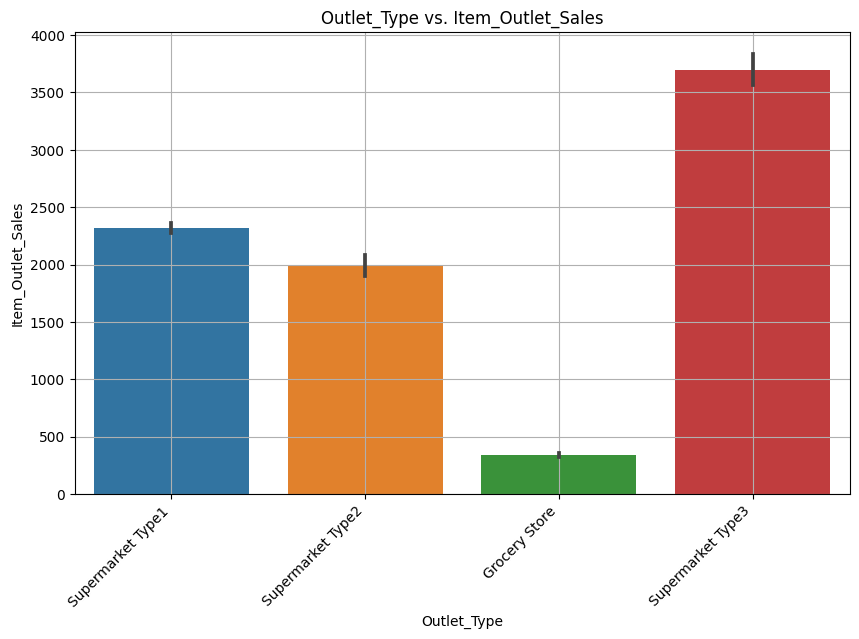

In [45]:
#Plot Outlet_Type against the target
plot_feature_vs_target(df, 'Outlet_Type')

***Feature-Target Observation***

1. Based on your business understanding, would you expect this feature to be a predictor of the target?

- Yes, I expected certain outlet types to have more sales than others.

2. Does this feature appear to be a predictor of the target?

- Yes, Supermarket Type 3 has the most sales

#Item_Outlet_Sales
*Sales of the product in the particular store. This is the target variable to be predicted.*

Number of rows with null values: 0
Percentage of null values: 0.00%
'Item_Outlet_Sales' is Not constant or quasi-constant.
The cardinality of 'Item_Outlet_Sales' feature is: 3493


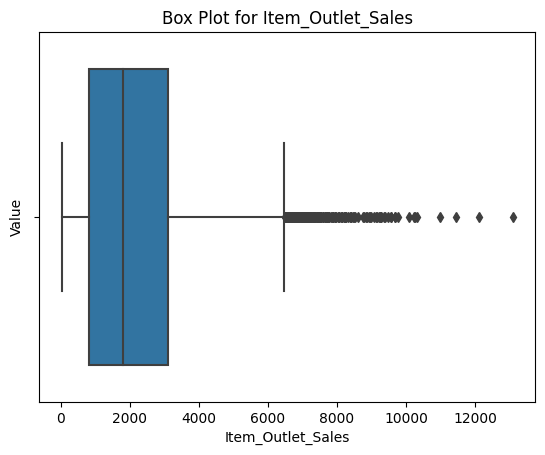

In [46]:
analyze_numeric_feature(df, 'Item_Outlet_Sales');

***Feature Observations:***

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)

- Categorical numerical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- 0 null value
- (0.0%)

3. Is the feature constant or quasi-constant?

- No

4. What is the cardinality? Is it high (>10)?

- 3493 unique values, high cardinality

5. Would we know this feature before the target is determined?

- Yes
6. Is there a business case/understanding reason to exclude based on our business case?

- Yes, this is the target variable.
